# Programando Algoritmos Cuánticos II: algoritmo de Grover

## Introducción teórica

Una vez hemos explorado la utilidad de los algoritmos cuánticos con el algoritm de Deutsch-Jozsa, vamos a aplicar los mismo conceptos para resolver un problema de mayor interés: la búsqueda en listas desordenadas. El problema en questión es el siguiente: dada una lista de $N$ items, tenemos que encontrar en ella el item marcado:

<img src="figs/list.png" width=500>

La manera más trivial de resolver este problema es coger la lista y uno por uno ir chequeando cada uno de los items para ver si es el marcado. Esto supone que de media, tenemos que mirar al menos $N/2$ items para encontrar el marcado, por lo que el algoritmo escala linearmente con $n$, que se expresa como $\mathcal{O}(n)$. Aun que pueda parecer trivial, este método es el más eficiente trabajando con ordenadores clásicos. El algortimo de Grover [<sup>1</sup>](https://arxiv.org/pdf/quant-ph/9605043.pdf) trata de resolver el mismo problema, pero mediante un algoritmo cuántico. Como veremos a continuación, este algoritmo escala como $\mathcal{O}(\sqrt{n})$, mostrando la superiodad de la computación cuántica. Existen varias implementaciones experimentales en diferentes plataformas, como por ejemplo [esta implementacion](https://arxiv.org/pdf/1703.10535.pdf) en un ordenador cuánticos de iones atrapados.

### El oráculo
¿Una vez tenemos la lista en nuestras, como sabemos cual es el item marcado? El problemas de la búsqueda en listas desordenadas se puede transformar en lo siguiente: encuentra el entero $w$ tal que
$$
f(x) =
  \begin{cases}
    1  & \quad \text{si } x = w\\
    0  & \quad \text{si } x \neq w
  \end{cases}
$$  
Si vamos introduciendo uno a uno los items de la lista y comprobando el valor de $x$, podremos encontrar $w$. Pero como hemos dicho antes, necesitariamos aplicar $f(x)$ de media $N/2$ veces. Para poder resolver el problema de la búsqueda en un ordenador cuántico, debemos transformar $f(x)$ a una operación cuántica, de manera que nos permita obtener una ventaja con respeceto al algoritmo clásico. Lo que haremos será codificar la función como una matriz unitaria, que llamaremos *oráculo*. Si codificamos cada uno de los items de la lista en un estado cuántico, $x\rightarrow |x\rangle$, entonces podemos definir el oráculo como la matriz $U_w$, que actua sobre $|x\rangle$ como
$$
U_w|x\rangle = (-1)^{f(x)}|x\rangle
$$
Por tanto, vemos que el oráculo $U_w$ deja invariante todos los estados no marcados, $U_w|x_i\rangle = |x_i\rangle$, pero produce una reflexión sobre el estado marcado, $U_w|w\rangle = -|w\rangle$. 

El oráculo es una función que nos viene dada como problema, de la misma manera que nos darían la función $f(x)$. Por lo tanto podemos considerarlo como una caja negra, de la cual no sabemos el funcionamiento, ya que si lo supieramos, podriamos inducir $w$ de manera trivial.

### Codificando la lista en estados cuánticos
Una vez hemos entendido como discernir el item marcado de nuestra lista mediante una operación cuántica, tenemos que encontrar una manera de codificar los items en estados cuánticos. Una manera muy sencilla es codificar los items como un estado producto de qubits, cuyo valor puede ser 0 o 1: $x\rightarrow |x^{(1)},x^{(2)},...x^{(N)}\rangle$, donde $x^{(i)}\in \{0,1\}$. ¿Como sabemos cuantos qubits necesitamos para codificar $n$ items? Como los qubist pueden tomar dos valores, teniendo $N$ podemos crear $2^N$ configuraciones diferentes. Por tanto, tenemos que $2^N=n$, por lo que necesitamos $N=\log_2 n$ qubits.

Hasta aquí, el hecho de codificar los items en estados cuánticos no nos ha dado ninguna ventaja sobre el algoritmo clásico. Para conseguir esta ventaja, tenemos que utilizar propiedades de los estados cuánticos que no tengan análogo en el mundo claásico. En este caso, utilizaremos superposición cuántica de estados. Más concretamente, vamos a transformar la lista entera en una superposición cuántica de los diferentes items. Como en un principio no sabemos que item es el marcado, vamos a crear una superposición uniforme, es decir, una superposición en la cual todos los estados tienen la misma probabilidad de ser medidos:
$$
|s\rangle = H^{\otimes N}|0\rangle^{\otimes N} = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle
$$

**Ejercicio:** ¿Cual es la probabilidad de medir cada uno de los diferentes estados $|x\rangle$?

Si midieramos este estado en la base de los estados $|x\rangle$, esta superposición colapsaria con probabilidad $1/N$ en cualquiera de los estados que la componen. Por tanto, seguiriamos necesitando $~N/2$ mediciones para encontrar $|w\rangle$, al igual que en el caso clásico. El algoritmo de Grover consiste en incrementar la probabilidad de que $|s\rangle$ colapse en $|w\rangle$. Vamos a ver como podemos hacer tal cosa.

### Amplificación de amplitud
Como hemos dicho, nuestro objetivo es incrementar la probabilidad de que $|s\rangle$ colapse en el item marcado. Para ello, tenemos que incrementar la amplitud del estado $|w\rangle$ en la superposición $|s\rangle$. El algoritmo de amplificación de amplitud tiene una analogía geométrica que nos va a ayudar a entender su funcionamiento. Vamos a introducir un nuevo estado $|s'\rangle$, que definimos como la superposición de todos los items de la lista menos el item marcado. Si ahora ploteamos en el espacio creado por $|w\rangle$ y $|s'\rangle$ el estado $|s\rangle$, que definimos con el estado inicial $|\psi_0\rangle$ de nuestro circuito, tenemos lo siguiente:

<img src="figs/grov_psi0.png" width=600>

En la figura de la derecha, hemos dibujado la amplitud de cada uno de los estados que forman la superposición $|s\rangle$. Como vemos, todos tiene igual amplitud, que corresponde con la amplitud media $1/\sqrt{N}$. El algortimo de amplificación de amplitud consta ahora de dos pasos:

#### Paso 1 - Marcando los items de la lista mediante el oráculo: Reflexión con respecto al eje
El primer paso del algoritmo consiste en aplicar el oráculo al estado inicial. Con esto tendremos un nuevo estado $|\psi_t\rangle = U_w|\psi_0\rangle$. En términos del espacio que hemos construido con $|w\rangle$ y $|s'\rangle$, esto significa hacer una reflexión con respecto al eje $|s'\rangle$:

<img src="figs/grov_psit.png" width=600>

#### Paso 2 - Aplicar el operador de Grover: Reflexión con respecto a la media
El segundo paso consiste en aplicar el *operador de Grover*, que definimos como $U_s = (2|s\rangle \langle s | -1)$. Si aplicamos este operador a nuestro estado, obtenemos $|\psi_{t+1}\rangle =U_s|\psi_{t}\rangle = U_s U_w|\psi_0\rangle$. Geométricamente, este operador produce una reflexión con respecto al estado inicial $|s\rangle$. En términos de la amplitud de los estados de la superposición, el operador produce una reflexión con respecto a la media de las amplitudes:

<img src="figs/grov_psit1.png" width=600>

**Ejercicio:** Demuestra que aplicar el operador $U_s$ al estado $|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}a(x)|x\rangle$ produce una reflexión de las amplitudes con respecto a la media $\langle a \rangle$.


En términos geométricos, podemos decir que dos reflexiones corresponden a una rotación, por lo que decimos que la amplificación de amplitud $U_s U_w$ produce una rotación que acerca el estado inicial $| s\rangle$ al estado marcado $| w\rangle$. De manera aproximada, cada rotación amplifica la amplitud del estado $| w\rangle$ unas tres veces su valor original. Por tanto, para obtener mejores resultados, aplicaremos el proceso de amplificación un numero $k$ de veces, de manera que la amplitud $a(w)$ sea tan grande con respecto al resto que la superposición siempre colapse hacia $| w\rangle$. Por tanto tendremos que el estado final es

$$
| \psi_k\rangle = (U_s U_w)^k |s\rangle
$$

El número $k$ es entonces indicativo de la complejidad de nuestro algoritmo. Se puede demostrar como es necesario aplicar aproximadamente $\mathcal{O}(\sqrt{N})$ rotaciones (por tanto $k=\sqrt(N)$) para solucionar el problema. Si en vez de tener un único número marcado tuvieramos $M$, el algoritmo necesitaria de $\sqrt{N/M}$ rotaciones.

## Implementación

Ahora que sabemos la base teórica del algoritmo de Grover, vamos a aplicarlo en el ordenador cuántico de IBM. Nuestro objetivo es aplicarlo utilizando 3 qubits, por lo que podemos crear una lista de $N=2^3=8$ elementos. Para entender en detalle el funcionamiento del algoritmo, primero usaremos el backend *'statevector_simulator'*, con el objetivo de trackear explicitamente las amplitudes de los diferentes estados de la lista. Luego, usaremos el backend *'qasm_simulator'*, que nos permite hacer medidas sobre los qubits del circuito, acercandonos a la aplicación real en un ordenador cuántico. Finalmente, implementaremos el algoritmo en un ordenador cuántico real.

Para empezar, vamos a importar las librerias necesarias

In [1]:
#initialization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# importing Qiskit
from qiskit import IBMQ, BasicAer, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram, plot_state_city

### Definición del circuito

El circuito que teneis que implementar es el siguiente:

<img src="figs/grov_circuit1.png" width=700>

En  este caso el algoritmo de Grover solo necesita una iteración, por lo que aplicaremos una única vez el oráculo y el operador de Grover. Aquí teneis el oráculo que marca los items de la lista, vuestro objetivo es utilzar el algoritmo de Grover para encontrarlos.

In [11]:
def phase_oracle(circuit, register):
    circuit.z(register)
    circuit.cz(register[1],register[0])
    circuit.cz(register[2],register[0])
    circuit.cz(register[2],register[1])

**Init:** 
 Para empezar teneis que crear un circuito en el cual tengais en superposición los diferentes estados de la lista. Es decir, el circuito despues de la fase incial ha de estar en el estado 
$$|\psi\rangle = \frac{1}{\sqrt{8}}(|000\rangle+|001\rangle+|010\rangle+|100\rangle+|110\rangle+|011\rangle+|101\rangle+|111\rangle).$$

In [59]:
# Solución
# Crear un circuito en el cual tengais superposición los diferentes estados de la lista
n = 3
quantum_reg = QuantumRegister(n)
classical_reg = ClassicalRegister(n)
dj_circuit = QuantumCircuit(quantum_reg,classical_reg,name='Grover')

# Para poner en superposición todos los estados de la lista 
dj_circuit.h(0)
dj_circuit.h(1)
dj_circuit.h(2)






Para visualizar los resultados, vamos a utilizar el backend `statevector_simulator`, que nos permite extraer los valores de las amplitudes y las fases de los diferentes estados en superposición de nuestro estado global. Esto nos permitirá seguir de manera visual el efecto del algoritmo de ampliación de fase.

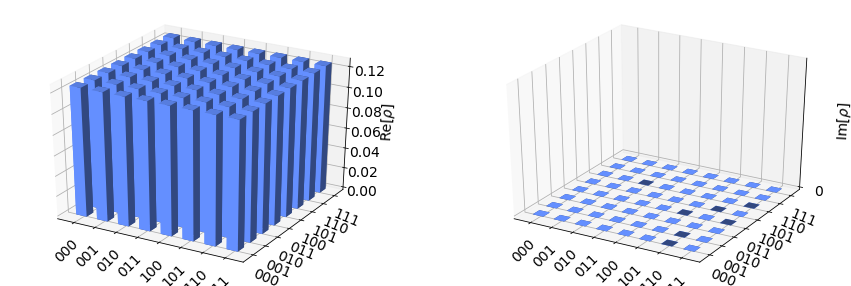

In [60]:
groverCircuit = dj_circuit
groverCircuit.barrier()
job = execute(groverCircuit, Aer.get_backend('statevector_simulator'))
result = job.result()
outputstate = result.get_statevector(groverCircuit, decimals=3)
plot_state_city(outputstate, ax_imag=None)

**Oráculo:** Ahora aplicar el oráculo vuestro circuito y volved a plotear las amplitudes. Con esto tendreís ya una ligera pista de cuales son los items marcados!

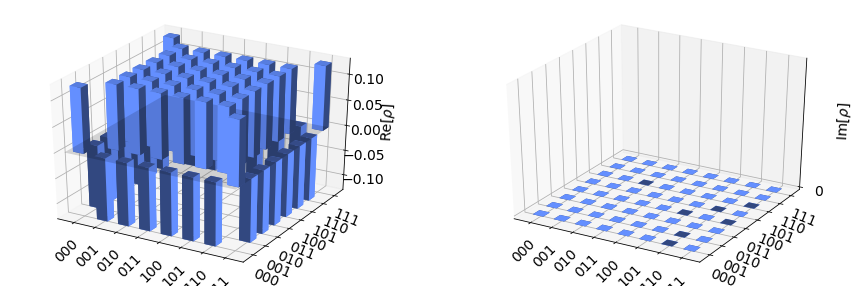

In [61]:
# Solución
# Ahora aplicaresmo el horáculo
phase_oracle(groverCircuit, quantum_reg)
groverCircuit.barrier()
job = execute(groverCircuit, Aer.get_backend('statevector_simulator'))
result = job.result()
outputstate = result.get_statevector(groverCircuit, decimals=3)
plot_state_city(outputstate, ax_imag=None)



**Operador de Grover:** El siguiente paso es aplicar el operador de Grover. La forma exacta de este operador en forma de circuito es compleja, por lo que limitaros a mirar la imagen del circuito de más arriba y aplicar las mias puertas. Para mas detalles sobre la forma del circuito, mirar [este artículo](https://arxiv.org/pdf/1703.10535.pdf), donde el tipo de oráculo que nosotros hemos definido aquí ellos lo definen como *phase oracle*.

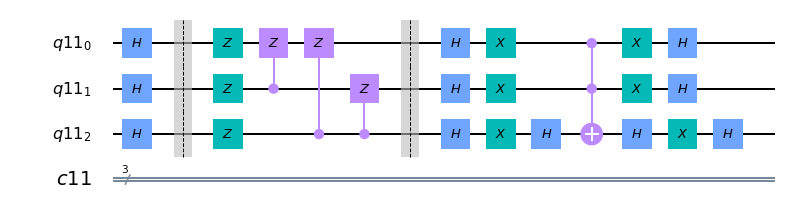

In [62]:
# Solución
# No entiendo este paso
# Copiar la imagen que pone él en la pizarra

groverCircuit.h(0)
groverCircuit.h(1)
groverCircuit.h(2)
groverCircuit.x(0)
groverCircuit.x(1)
groverCircuit.x(2)
groverCircuit.h(2)
groverCircuit.ccx(quantum_reg[0],quantum_reg[1],quantum_reg[2])
groverCircuit.x(0)
groverCircuit.x(1)
groverCircuit.h(2)
groverCircuit.h(0)
groverCircuit.h(1)
groverCircuit.x(2)
groverCircuit.h(2)


groverCircuit.draw(output = 'mpl')




**Mediciones:** Ahora medir el circuito y plotear el histograma de los counts. Utilizar como backend el `qasm_simulator` y luego los chips cuánticos. ¿Encontrais los mismo resultados?

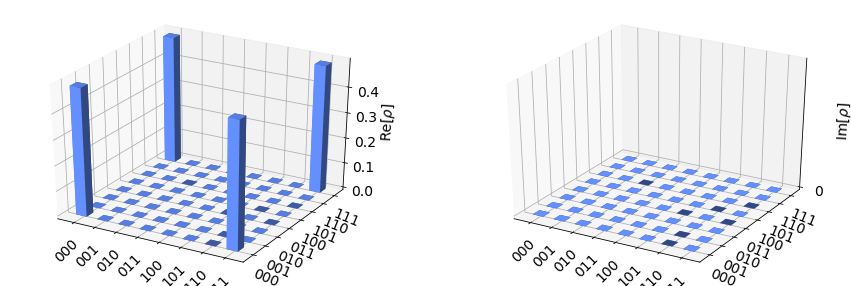

In [63]:
job = execute(groverCircuit, Aer.get_backend('statevector_simulator'))
result = job.result()
outputstate = result.get_statevector(groverCircuit, decimals=3)
plot_state_city(outputstate, ax_imag=None)

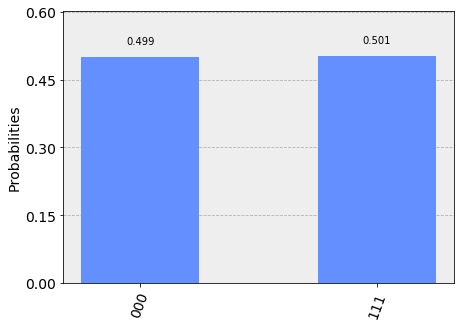

In [64]:


# Solución
groverCircuit.measure(0,0)
groverCircuit.measure(1,1)
groverCircuit.measure(2,2)
circuito = groverCircuit
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuito,simulator,shots = 1000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)

In [ ]:
# Ahora vamos a intentar ejecutarlo en el chip cuántico
IBMQ.load_account()
provider = IBMQ.get_provider() 
provider.backends()
backend_lb = providers.ibmq.least_busy(provider.backends(simulator=False))
print("Least busy backend: ", backend_lb)
job = execute(groverCircuit,backend_lb,shots = 1000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)